In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [6]:
data = sqlite3.connect('/content/drive/My Drive/data/checking-logs.sqlite.sqlite')

In [7]:
commits = pd.io.sql.read_sql(
    "select timestamp from checker where uid like 'user_%'",
    data, parse_dates=['timestamp']
    )

In [8]:
data.close()

In [9]:
commits['date'] = commits['timestamp'].dt.floor('d')
commits['hour'] = commits['timestamp'].dt.hour
commits = commits.drop('timestamp', axis=1)

In [10]:
working_day = commits.loc[commits['date'].dt.dayofweek < 5]['hour']
weekend = commits.loc[commits['date'].dt.dayofweek >= 5]['hour']
working_day = working_day.reset_index(drop=True)
weekend = weekend.reset_index(drop=True)

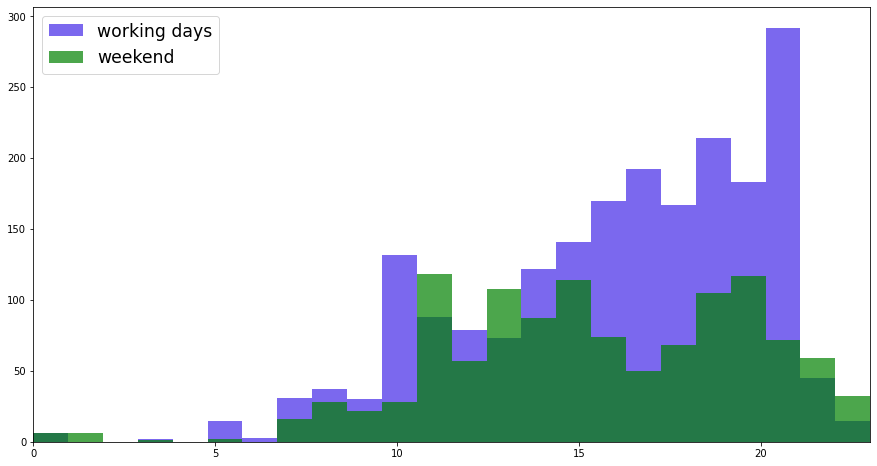

In [11]:
fig, graph = plt.subplots(figsize=(15, 8))
graph.hist(working_day, bins=24, label='working days', color='mediumslateblue')
graph.hist(weekend, bins=24, label='weekend', color='green', alpha=0.7)
graph.set_xlim(0, 23)
graph.legend(loc='upper left', fontsize='xx-large')
plt.show()

Are there hours when the total number of commits was higher on weekends than
on working days?
11, 13, 22, 23, 00